# 다중 출력 회귀

- 타겟변수 y가 하나의 값을 갖는 것이 아니라 다수의 값을 갖는 경우
- 회귀와 분류
 - (회귀)출력이 벡터 형태로 다수의 아나로그 값을 갖는 경우
 - (분류)출력이 남여 구분이 아니라 국적 구분도 해야 하는 경우(multi-class output)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from numpy.random import rand, randn

## 데이터 생성
- 시스템의 입력과 출력 데이터 생성 함수

In [3]:
def get_random_x(n_steps=30):
    a = 0.5 + rand() # 0.5 ~ 1.5 사이의 임의의 레벨 선택
    xs = np.linspace(0,6,n_steps)
    ys = -0.1*a*xs*(xs -6) # y = -a*x(x-6) 거리가 6 나가는 포물선
    return ys

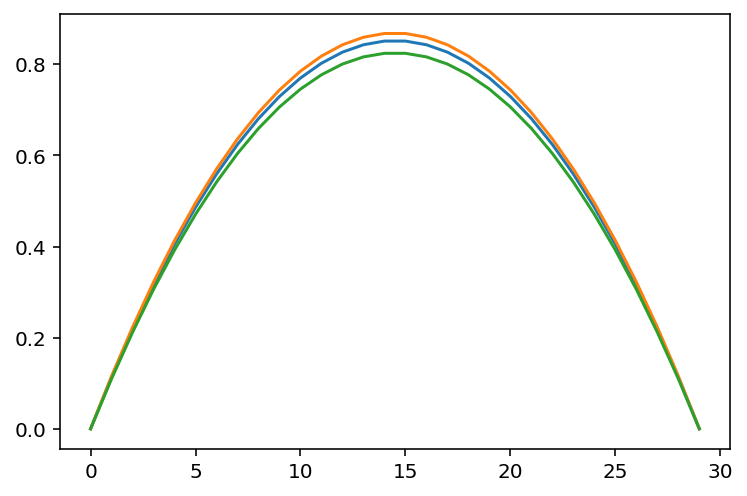

In [4]:
# 랜덤한 입력 신호 생성
plt.plot(get_random_x())
plt.plot(get_random_x())
plt.plot(get_random_x())

In [5]:
get_random_x()

array([ 0.        ,  0.05998481,  0.11568498,  0.16710053,  0.21423145,
        0.25707774,  0.2956394 ,  0.32991644,  0.35990884,  0.38561661,
        0.40703976,  0.42417827,  0.43703216,  0.44560142,  0.44988605,
        0.44988605,  0.44560142,  0.43703216,  0.42417827,  0.40703976,
        0.38561661,  0.35990884,  0.32991644,  0.2956394 ,  0.25707774,
        0.21423145,  0.16710053,  0.11568498,  0.05998481, -0.        ])

In [6]:
# 임의의 출력을 얻는 함수 (4개를 얻는다고 가정) 
def get_4_y(x):
    y1 = x.sum() + 1.8*randn()
    y2 = (x**2).sum() + 1.8*randn()
    y3 = (x**3).sum() + 1.8*randn()
    y4 = (x**4).sum() + 1.8*randn()
    return y1, y2, y3, y4

In [7]:
sample = get_random_x()
print('X=', sample)
print('y=',get_4_y(sample))

X= [ 0.          0.15744272  0.30363953  0.43859043  0.56229542  0.6747545
  0.77596768  0.86593495  0.94465631  1.01213176  1.0683613   1.11334493
  1.14708266  1.16957448  1.18082038  1.18082038  1.16957448  1.14708266
  1.11334493  1.0683613   1.01213176  0.94465631  0.86593495  0.77596768
  0.6747545   0.56229542  0.43859043  0.30363953  0.15744272 -0.        ]
y= (24.806005879881138, 18.389083550012874, 20.696168855793317, 26.105376249703216)


In [8]:
# 샘플 데이터 X, y 생성
N = 200
samples = []
multi_y = []
for i in range(N):
    x = get_random_x()
    samples.append(x)
    multi_y.append(get_4_y(x))
X = np.array(samples)
y = np.array(multi_y)

In [9]:
X.shape, y.shape

((200, 30), (200, 4))

In [10]:
X[:3], y[:3]

(array([[ 0.        ,  0.08786757,  0.16945889,  0.24477395,  0.31381276,
          0.37657531,  0.43306161,  0.48327165,  0.52720543,  0.56486297,
          0.59624424,  0.62134926,  0.64017803,  0.65273054,  0.65900679,
          0.65900679,  0.65273054,  0.64017803,  0.62134926,  0.59624424,
          0.56486297,  0.52720543,  0.48327165,  0.43306161,  0.37657531,
          0.31381276,  0.24477395,  0.16945889,  0.08786757, -0.        ],
        [ 0.        ,  0.12548533,  0.24200742,  0.34956628,  0.44816189,
          0.53779427,  0.61846341,  0.69016931,  0.75291198,  0.80669141,
          0.85150759,  0.88736055,  0.91425026,  0.93217674,  0.94113997,
          0.94113997,  0.93217674,  0.91425026,  0.88736055,  0.85150759,
          0.80669141,  0.75291198,  0.69016931,  0.61846341,  0.53779427,
          0.44816189,  0.34956628,  0.24200742,  0.12548533, -0.        ],
        [ 0.        ,  0.11052073,  0.21314713,  0.30787918,  0.3947169 ,
          0.47366028,  0.54470932,  

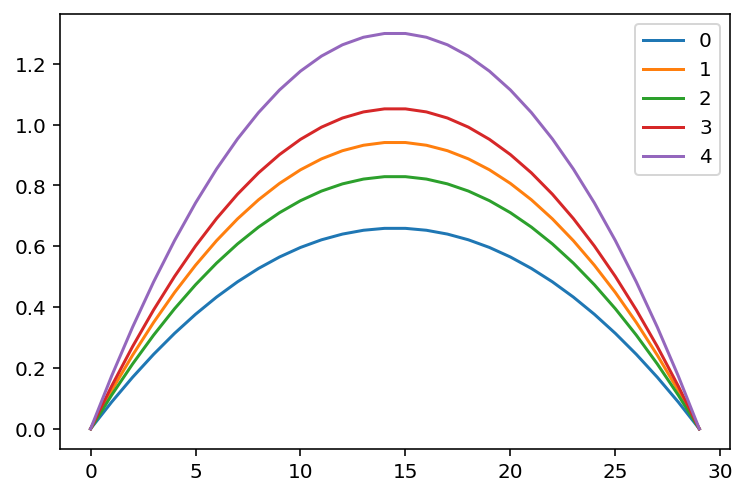

In [11]:
for i in range(5):
    plt.plot(X[i], label=str(i))
    plt.legend()

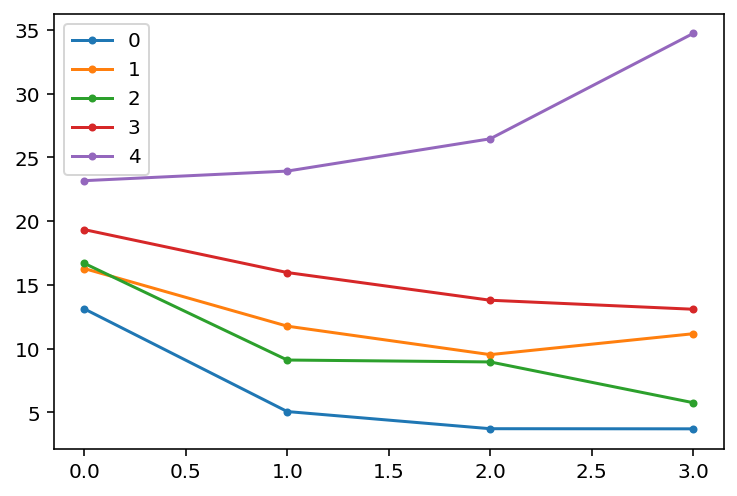

In [12]:
for i in range(5):
    plt.plot(y[i], label=str(i), marker='.')
    plt.legend()

### 모든 입력 데이터를 사용한 다중회귀 예측

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

## 컬럼별로 r2 구하기
- 목적 변수에 4개의 컬럼(y1, y2, y3, y4) 이 있다
- 각 컬럼별로 r2 구하기

In [15]:
y_pred = rfr.predict(X_test)
r2_score(y_test, y_pred, multioutput="raw_values")

array([0.8233261 , 0.9323017 , 0.95675413, 0.96717544])

In [16]:
# 과제: 노이지가 많아서 y를 생성할 때 노이지 레벨을 0.1, 0.2, 0.3 로 바꾸어본다.
# 실제값과 예측치를 비교해서 그려보시오(plot) (y_test, y_pred 비교): 4세트가 있다!

In [17]:
y_pred.shape

(50, 4)

In [18]:
y_test.shape

(50, 4)

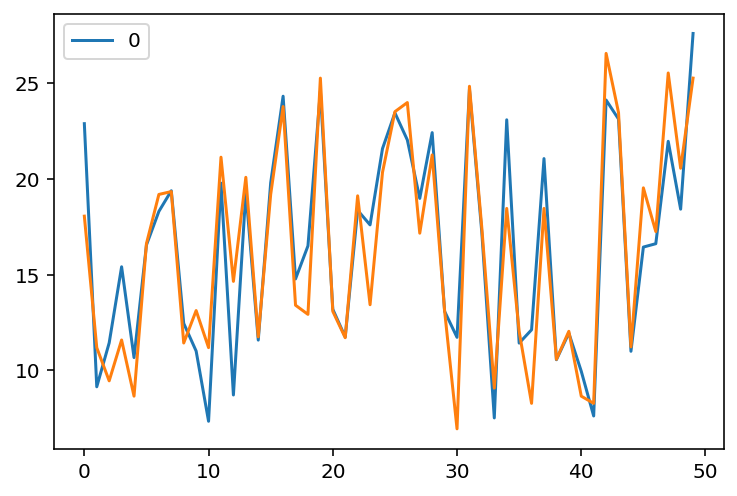

In [19]:
for i in range(1):
    plt.plot(y_test[:,i], label=str(i))
    plt.plot(y_pred[:,i])
plt.legend()

In [113]:
r2_score(y_test, y_pred, multioutput="raw_values")

array([0.81179473, 0.91040412, 0.95140719, 0.95863745])

In [114]:
# 컬럼별 r2의 평균을 보여준다
r2_score(y_test, y_pred)

0.9080608738705497

# 다중 분류
- multi-class output 모델
- y로 단일 값이 아니라 아래와 같이 다중 값을 사용
 - multi_y = np.c_[y1, y2] 또는
 - multi_y = np.stack((y1,y2)).T 사용